<a href="https://colab.research.google.com/github/orochi1972/MSc_project/blob/master/MSc_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import Normalizer,StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# drop the data that exclude the location list
# locations = pd.read_csv("drive/My Drive/locations.csv")
# hashset = set(locations.Tiploc)
# unwanted_index = []
# for i,key in enumerate(data.Tiploc):
#   if key not in hashset:
#     unwanted_index.append(i)
# data = data.drop(index=unwanted_index)
# data.to_csv("drive/My Drive/all_data.csv",index=False)


In [ ]:
# load data
filePath = os.listdir("drive/My Drive/")
print(filePath)
data =pd.read_csv("drive/My Drive/aweekdata.csv")
data

['Colab Notebooks', '.ipynb_checkpoints', 'model', 'model2', 'DMCW', 'DM_LSTM_c.ipynb', 'DM_LSTM_a.ipynb', 'DM_LSTM_b.ipynb', 'data_test.csv', 'locations.csv', 'alldata.csv', 'halfdata.csv', 'all_data.csv', 'project.ipynb', 'aweekdata.csv']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SysUID,UID,DateRun,HDC,TOC,TLD,Weight,Tiploc,Arr_Planned,Dep_Planned,Pass_Planned,Arr_Actual,Dep_Actual,Pass_Actual,LateArr,LateDep,LatePass,LateLeaving
0,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,NRCHTMD,NaN,31/01/2018 05:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TRWSSBJ,NaN,NaN,31/01/2018 05:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TROWSEJ,NaN,NaN,31/01/2018 05:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TROWLKJ,NaN,NaN,31/01/2018 05:09:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,DISS,NaN,NaN,31/01/2018 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795932,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,WHTLSEA,NaN,NaN,01/01/2018 19:38:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795933,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,THRHRSH,NaN,NaN,01/01/2018 19:42:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795934,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,MRCHWJN,NaN,NaN,01/01/2018 19:47:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795935,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,WHTMJN,NaN,NaN,01/01/2018 19:50:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.DataFrame()
df["UID"] = data["UID"]
df["DataRun"] = data["DateRun"]
df["Location"] = data["Tiploc"]
df["LateLeaving"] = data["LateLeaving"]

df.dropna(subset=["LateLeaving"],inplace=True)

In [ ]:
t = df[(df.LateLeaving>300) | (df.LateLeaving<-300)]
t =t.groupby("Location").size()
t = t.to_frame()
t.columns =["Amount"]

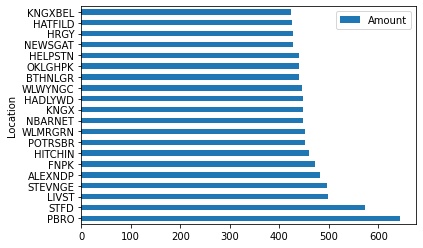

In [ ]:
# delays summay
t = t.sort_values(by="Amount",ascending=False)
t.iloc[:20].plot.barh()

In [ ]:
df2 = pd.DataFrame()
#df2["Arr_Planned"] = data["Arr_Planned"]
df2["Pass_Planned"] = data["Pass_Planned"]
#df2["Dep_Planned"] = data["Dep_Planned"]
df2["LateLeaving"] = data["LateLeaving"]

In [ ]:
df2.dropna(subset=["Pass_Planned","LateLeaving"],inplace=True)
df2["LateLeaving"] = df2["LateLeaving"].apply(lambda x: abs(x))
df2.set_index("Pass_Planned")
# df2.to_csv("timedelays.csv")

,LateLeaving
Pass_Planned,
31/01/2018 13:23:05,1583.0
31/01/2018 13:24:08,1595.0
31/01/2018 13:28:21,1876.0
31/01/2018 13:28:30,1830.0
31/01/2018 13:32:00,1723.0
...,...
02/01/2018 01:21:00,2081.0
02/01/2018 01:31:30,1916.0
02/01/2018 01:41:00,1924.0


In [ ]:
data.dtypes

SysUID           object
UID              object
DateRun          object
HDC              object
TOC              object
TLD              object
Weight           object
Tiploc           object
Arr_Planned      object
Dep_Planned      object
Pass_Planned     object
Arr_Actual       object
Dep_Actual       object
Pass_Actual      object
LateArr         float64
LateDep         float64
LatePass        float64
LateLeaving     float64
dtype: object

In [ ]:
data["Arr_Planned"] = pd.to_datetime(data["Arr_Planned"])
data["Dep_Planned"] = pd.to_datetime(data["Dep_Planned"])
data["Pass_Planned"] = pd.to_datetime(data["Pass_Planned"])
data["Arr_Actual"] = pd.to_datetime(data["Arr_Actual"])
data["Dep_Actual"] = pd.to_datetime(data["Dep_Actual"])
data["Pass_Actual"] = pd.to_datetime(data["Pass_Actual"])

In [ ]:
# calculate period between two dates
def duration(date1,date2):
  if date1 >= date2:
    return (date1-date2).seconds
  else:
    return (date2-date1).seconds  

data

,SysUID,UID,DateRun,HDC,TOC,TLD,Weight,Tiploc,Arr_Planned,Dep_Planned,Pass_Planned,Arr_Actual,Dep_Actual,Pass_Actual,LateArr,LateDep,LatePass,LateLeaving
0,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,NRCHTMD,NaT,2018-01-31 05:03:00,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
1,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TRWSSBJ,NaT,NaT,2018-01-31 05:08:00,NaT,NaT,NaT,NaN,NaN,NaN,NaN
2,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TROWSEJ,NaT,NaT,2018-01-31 05:09:00,NaT,NaT,NaT,NaN,NaN,NaN,NaN
3,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,TROWLKJ,NaT,NaT,2018-01-31 05:09:22,NaT,NaT,NaT,NaN,NaN,NaN,NaN
4,L20001180131,L20001,31/01/2018,0F03,LE,E,NaN,DISS,NaT,NaT,2018-01-31 05:25:00,NaT,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795932,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,WHTLSEA,NaT,NaT,2018-01-01 19:38:30,NaT,NaT,NaT,NaN,NaN,NaN,NaN
795933,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,THRHRSH,NaT,NaT,2018-01-01 19:42:22,NaT,NaT,NaT,NaN,NaN,NaN,NaN
795934,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,MRCHWJN,NaT,NaT,2018-01-01 19:47:30,NaT,NaT,NaT,NaN,NaN,NaN,NaN
795935,H34788180101,H34788,01/01/2018,FRGT,ZZ,D,NaN,WHTMJN,NaT,NaT,2018-01-01 19:50:30,NaT,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# read location list
checkDic={}
locations = pd.read_csv("drive/My Drive/locations.csv")
s = set(locations.Tiploc)
checkDic = {k:[] for k in s}
checkList = [checkDic for i in range(7)]

In [ ]:
# bulid interactions check lists
i=0
while i <len(data):
  if not pd.isnull(data.Pass_Actual[i]):
    if not pd.isnull(data.Tiploc[i]):
      if data.Tiploc[i] in s:
        checkList[data.Pass_Actual[i].weekday()][data.Tiploc[i]].append(data.Pass_Actual[i])
  i+=1

In [ ]:
cleaned = pd.DataFrame(columns=["DepWeek","DepHour","DepMin","Duration","HDC","TOC","TLD","StartLoc","EndLoc","Delays","Interaction"])
cleaned

,DepWeek,DepHour,DepMin,Duration,HDC,TOC,TLD,StartLoc,EndLoc,Delays,Interaction


In [ ]:
# transform data
i = 0
while i< len(data):
  dic={}
  if not pd.isnull(data.Dep_Planned[i]):
    interaction = 0
    j=i+1
    while pd.isnull(data.Arr_Planned[j]):
      # check interactions
      if data.Tiploc[j] in checkList[data.Dep_Planned[i].weekday()]:
        for passtimes in checkList[data.Dep_Planned[i].weekday()][data.Tiploc[j]]:
          if duration(data.Pass_Planned[j],passtimes)<60:
            interaction+=1
      j+=1
    dic["DepWeek"] = data.Dep_Planned[i].weekday()
    dic["DepHour"] = data.Dep_Planned[i].hour
    dic["DepMin"] = data.Dep_Planned[i].minute
    dic["Duration"] = duration(data.Arr_Planned[j],data.Dep_Planned[i])
    dic["HDC"] = data.HDC[i]
    dic["TOC"] = data.TOC[i]
    dic["TLD"] = data.TLD[i]
    dic["StartLoc"] = data.Tiploc[i]
    dic["EndLoc"] = data.Tiploc[j]
    dic["Delays"] = abs(data.LateArr[j])
    dic["Interaction"] = interaction
    # print(dic)
    cleaned = cleaned.append(dic,ignore_index=True)
  i+=1
  if i%10000==1:
    print(i," of ",len(data)) 
  dic.clear()


1  of  795937
10001  of  795937
20001  of  795937
30001  of  795937
40001  of  795937
50001  of  795937
60001  of  795937
70001  of  795937
80001  of  795937
90001  of  795937
100001  of  795937
110001  of  795937
120001  of  795937
130001  of  795937
140001  of  795937
150001  of  795937
160001  of  795937
170001  of  795937
180001  of  795937
190001  of  795937
200001  of  795937
210001  of  795937
220001  of  795937
230001  of  795937
240001  of  795937
250001  of  795937
260001  of  795937
270001  of  795937
280001  of  795937
290001  of  795937
300001  of  795937
310001  of  795937
320001  of  795937
330001  of  795937
340001  of  795937
350001  of  795937
360001  of  795937
370001  of  795937
380001  of  795937
390001  of  795937
400001  of  795937
410001  of  795937
420001  of  795937
430001  of  795937
440001  of  795937
450001  of  795937
460001  of  795937
470001  of  795937
480001  of  795937
490001  of  795937
500001  of  795937
510001  of  795937
520001  of  795937
530001 

In [ ]:
#cleaned.Interaction.plot.hist()
#cleaned.to_csv("drive/My Drive/data_cleaned.csv")

In [ ]:
# def transformDelays(delay):
#   if delay <120:
#     return 0
#   elif delay <300:
#     return 1
#   elif delay <600:
#     return 2
#   elif delay >600:
#     return 3
# cleaned = cleaned.dropna()
# cleaned["Delays"] = cleaned["Delays"].apply(lambda x: transformDelays(int(x)))
# cleaned["Delays"] = cleaned["Delays"].astype("category")
# cleaned = cleaned.dropna()
# cleaned.isnull().any()

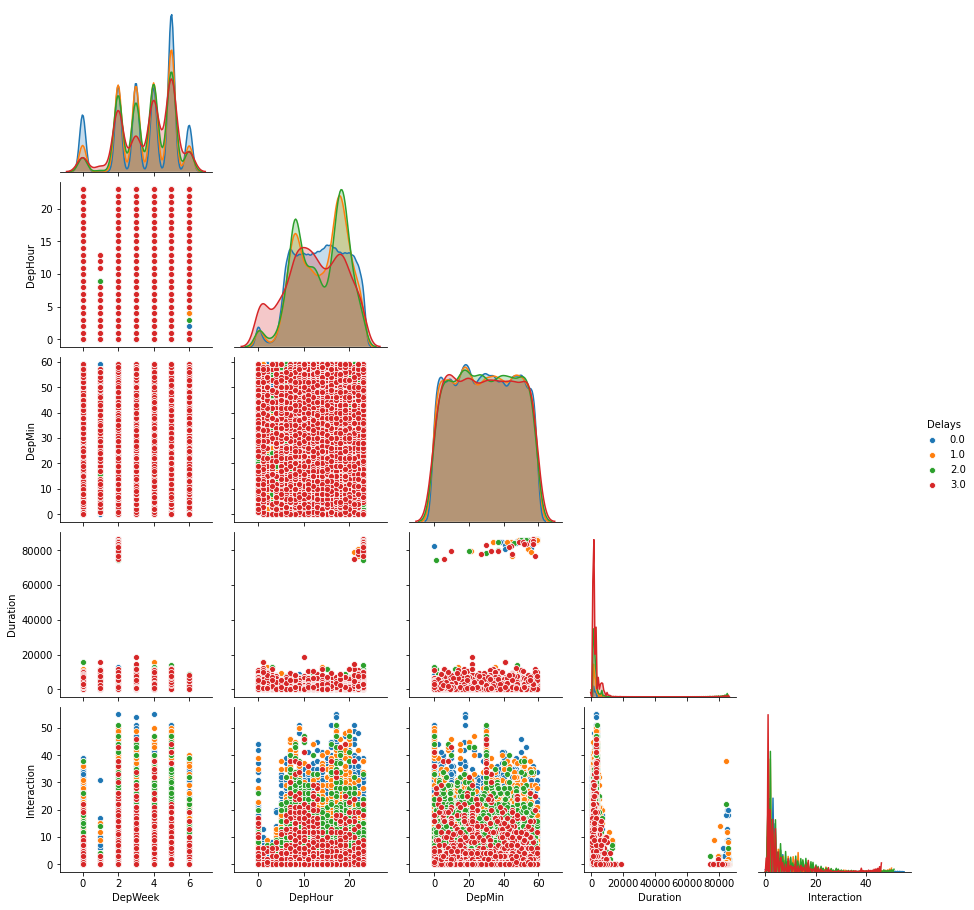

In [ ]:
#sns.pairplot(cleaned,hue="Delays",corner=True,)

In [ ]:
# cleaned = pd.read_csv("drive/My Drive/data_cleaned.csv",index_col=0)

In [ ]:
cleaned = cleaned.dropna(subset=["Delays"])
cleaned = cleaned.drop(columns=["HDC"])

In [ ]:
cleaned["Delays"] = cleaned["Delays"].astype("int")
cleaned.dtypes

DepWeek         int64
DepHour         int64
DepMin          int64
Duration        int64
TOC            object
TLD            object
StartLoc       object
EndLoc         object
Delays          int64
Interaction     int64
dtype: object

In [ ]:
# one hot encoding, convert categorical data to numercial data
dummy = pd.get_dummies(cleaned,columns=["TOC","DepWeek","TLD","StartLoc","EndLoc"])

In [ ]:
def transformDelays(delay):
  if delay <120:
    return 0
  elif delay <300:
    return 1
  elif delay <600:
    return 2
  elif delay >600:
    return 3

dummy["Delays"] = dummy["Delays"].apply(lambda x: transformDelays(int(x)))
dummy["Delays"] = dummy["Delays"].astype("category")
dummy = dummy.dropna()
dummy.isnull().any()

DepHour           False
DepMin            False
Duration          False
Delays            False
Interaction       False
                  ...  
EndLoc_YORK       False
EndLoc_YORKYSJ    False
EndLoc_YOVIJDS    False
EndLoc_YOVILJN    False
EndLoc_YOVILPM    False
Length: 1540, dtype: bool

In [ ]:
dummy = dummy.reset_index(drop=True)


In [ ]:
X = dummy.drop(columns=["Delays"])
y = dummy["Delays"]
# sc = Normalizer(norm="l2")
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
dummy

,DepHour,DepMin,Duration,Delays,Interaction,TOC_CC,TOC_EM,TOC_GC,TOC_GN,TOC_GR,TOC_HT,TOC_LE,TOC_LO,TOC_LR,TOC_SW,TOC_TL,TOC_XC,TOC_XR,TOC_ZZ,DepWeek_0,DepWeek_1,DepWeek_2,DepWeek_3,DepWeek_4,DepWeek_5,DepWeek_6,TLD_D,TLD_DEM,TLD_DMU,TLD_E,TLD_EMU,TLD_HST,StartLoc_ABHLJN,StartLoc_ABRDEEN,StartLoc_ACBG,StartLoc_ACLE,StartLoc_ACTNCTL,StartLoc_ACTONML,StartLoc_ACTONTC,StartLoc_ALDB337,...,EndLoc_WITHMDL,EndLoc_WITHMUL,EndLoc_WIVENHO,EndLoc_WKFLDKG,EndLoc_WKFLDWG,EndLoc_WLMSL,EndLoc_WLNGBRO,EndLoc_WLSD1DT,EndLoc_WLSDBRN,EndLoc_WLSDJHL,EndLoc_WLSDNJL,EndLoc_WLSDRMT,EndLoc_WLSDTMD,EndLoc_WLTWCEN,EndLoc_WLVR,EndLoc_WLVRTCS,EndLoc_WLWYNGC,EndLoc_WLWYNGY,EndLoc_WLWYNN,EndLoc_WMBYEFT,EndLoc_WNMHILL,EndLoc_WNOTLEY,EndLoc_WODBDGE,EndLoc_WOKING,EndLoc_WONNAZE,EndLoc_WRABNES,EndLoc_WRGT,EndLoc_WROXHAM,EndLoc_WSTBRDY,EndLoc_WSTBRYW,EndLoc_WSTRFLD,EndLoc_WTHRFHH,EndLoc_WTLESFD,EndLoc_WYMNDHM,EndLoc_YARMTH,EndLoc_YORK,EndLoc_YORKYSJ,EndLoc_YOVIJDS,EndLoc_YOVILJN,EndLoc_YOVILPM
0,13,14,180,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,22,8940,3.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,5,690,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,18,1020,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,37,750,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182184,2,22,900,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182185,2,47,1020,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182186,23,0,3090,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182187,23,57,2970,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)
# acc, precision , recall, f1_socre
def scoring(classifier,X,y,X_test,y_test):
        clf=classifier.fit(X,y)
        result=clf.predict(X_test)
        y_test=np.array(y_test)
        score =[accuracy_score(y_test,result),
                precision_score(y_test,result,average="weighted"),
                recall_score(y_test,result,average="weighted"),
                f1_score(y_test,result,average="weighted")]
        return score
def scoring2(y_predict,y_true):
    y_test = y_true
    result = y_predict
    score =[accuracy_score(y_test,result),
                precision_score(y_test,result,average="weighted"),
                recall_score(y_test,result,average="weighted"),
                f1_score(y_test,result,average="weighted")]
    return score

In [ ]:
# machien learning algorithms
clf1 = RandomForestClassifier()
clf2 = LinearSVC()
lr = LogisticRegression(max_iter=1000)
sclf = StackingClassifier(classifiers=[clf2, lr], 
                          meta_classifier=clf1)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, lr], 
                      ['Random Forest', 
                       'GBC',
                       'lr']):

    scores = cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.76 (+/- 0.00) [Random Forest]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.76 (+/- 0.00) [GBC]
Accuracy: 0.78 (+/- 0.00) [lr]


In [ ]:
# stacking 
scoring(sclf,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.7781547826954742, 0.7034317794534407, 0.7781547826954742, 0.705227138360591]

In [ ]:
# logistic regression
scoring(lr,X_train,y_train,X_test,y_test)

[0.7781547826954742, 0.7034317794534407, 0.7781547826954742, 0.705227138360591]

In [ ]:
# support vector machines
svm = LinearSVC()
scoring(svm,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.7596593649684813,
 0.6826504081751221,
 0.7596593649684813,
 0.7055676366527928]

In [ ]:
# decision trees
dt =DecisionTreeClassifier()
scoring(dt,X_train,y_train,X_test,y_test)

[0.7048883122931324, 0.706440985161747, 0.7048883122931324, 0.7056436887764358]

In [ ]:
# random forest
rfc = RandomForestClassifier()
scoring(rfc,X_train,y_train,X_test,y_test)

[0.7544866357300867,
 0.7126681324763456,
 0.7544866357300867,
 0.7287850295258601]

<BarContainer object of 30 artists>

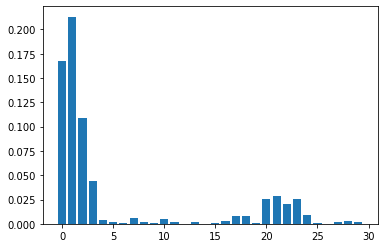

In [ ]:
# feature importance
importance = dt.feature_importances_
plt.bar([x for x in range(30)], importance[0:30])

<BarContainer object of 30 artists>

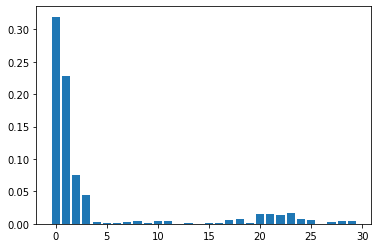

In [ ]:
importance = rfc.feature_importances_
plt.bar([x for x in range(30)], importance[0:30])

In [ ]:
# start to learn using neural networks
# one-hot encoding
y_train1 =pd.get_dummies(y_train).values
y_test1 = pd.get_dummies(y_test).values
y_test

94668     0.0
76246     0.0
170221    1.0
93833     0.0
115889    0.0
         ... 
145484    1.0
157481    0.0
22087     2.0
8139      0.0
83000     0.0
Name: Delays, Length: 60123, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [ ]:
# Neural network &training
model = Sequential()
model.add(Dense(16, input_dim=len(X_train[0]),activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train1, validation_data=(X_test,y_test1),epochs=50, batch_size=64)

Train on 122066 samples, validate on 60123 samples
Epoch 1/50
122066/122066 [==============================] - 7s 55us/step - loss: 0.6712 - accuracy: 0.7723 - val_loss: 0.6353 - val_accuracy: 0.7767
Epoch 2/50
122066/122066 [==============================] - 6s 53us/step - loss: 0.6259 - accuracy: 0.7791 - val_loss: 0.6333 - val_accuracy: 0.7767
Epoch 3/50
122066/122066 [==============================] - 6s 53us/step - loss: 0.6180 - accuracy: 0.7803 - val_loss: 0.6335 - val_accuracy: 0.7777
Epoch 4/50
122066/122066 [==============================] - 6s 51us/step - loss: 0.6131 - accuracy: 0.7810 - val_loss: 0.6323 - val_accuracy: 0.7776
Epoch 5/50
122066/122066 [==============================] - 6s 51us/step - loss: 0.6094 - accuracy: 0.7823 - val_loss: 0.6364 - val_accuracy: 0.7779
Epoch 6/50
122066/122066 [==============================] - 6s 51us/step - loss: 0.6062 - accuracy: 0.7831 - val_loss: 0.6371 - val_accuracy: 0.7786
Epoch 7/50
122066/122066 [=============================

In [ ]:
# network info

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                24640     
_________________________________________________________________
dense_20 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 52        
Total params: 24,896
Trainable params: 24,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
x = [ i for i in range(1,51)]

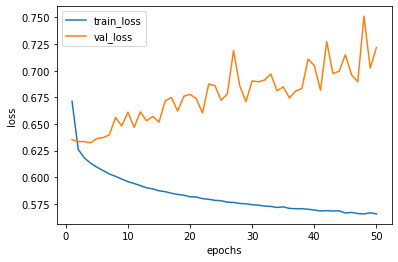

In [ ]:
plt.plot(x,train_loss,label="train_loss")
plt.plot(x,val_loss,label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

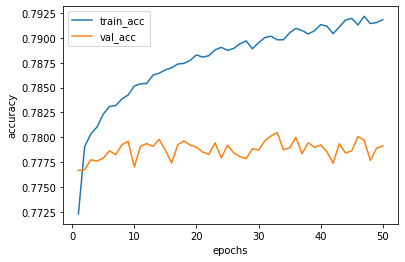

In [ ]:
plt.plot(x,train_acc,label="train_acc")
plt.plot(x,val_acc,label="val_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [ ]:
def trainANN(model,X_train,y_train1,X_test,y_test1,epo):
  history = model.fit(X_train, y_train1, validation_data=(X_test,y_test1),epochs=epo, batch_size=64)
  y_pred = model.predict(X_test)
  #Converting predictions to label
  pred = list()
  for i in range(len(y_pred)):
      pred.append(np.argmax(y_pred[i]))
  #Converting one hot encoded test label to label
  test = list()
  for i in range(len(y_test1)):
      test.append(np.argmax(y_test1[i]))

  return scoring2(pred,test)

In [ ]:
result =[]
for i in range(1,100):
  result.append(trainANN(model,X_train,y_train1,X_test,y_test1,1))

Train on 122066 samples, validate on 60123 samples
Epoch 1/1
122066/122066 [==============================] - 8s 63us/step - loss: 0.6842 - accuracy: 0.7702 - val_loss: 0.6413 - val_accuracy: 0.7759
Train on 122066 samples, validate on 60123 samples
Epoch 1/1
122066/122066 [==============================] - 8s 62us/step - loss: 0.6286 - accuracy: 0.7791 - val_loss: 0.6384 - val_accuracy: 0.7765
Train on 122066 samples, validate on 60123 samples
Epoch 1/1
122066/122066 [==============================] - 8s 63us/step - loss: 0.6201 - accuracy: 0.7806 - val_loss: 0.6353 - val_accuracy: 0.7774
Train on 122066 samples, validate on 60123 samples
Epoch 1/1
122066/122066 [==============================] - 8s 62us/step - loss: 0.6147 - accuracy: 0.7814 - val_loss: 0.6331 - val_accuracy: 0.7769
Train on 122066 samples, validate on 60123 samples
Epoch 1/1
122066/122066 [==============================] - 8s 66us/step - loss: 0.6108 - accuracy: 0.7825 - val_loss: 0.6333 - val_accuracy: 0.7776
Train

In [ ]:
result

[[0.775926018329092,
  0.6830636676287765,
  0.775926018329092,
  0.6859568722423744],
 [0.7765081582755351,
  0.6934495231925527,
  0.7765081582755351,
  0.6940594711298942],
 [0.7774229496199457,
  0.6961570368751818,
  0.7774229496199457,
  0.6949719325591308],
 [0.7769073399530961,
  0.693069511454808,
  0.7769073399530961,
  0.6944551825013356],
 [0.7775892753189295,
  0.7012149425093039,
  0.7775892753189295,
  0.6979843364619289],
 [0.7779385592867955,
  0.7034685527149885,
  0.7779385592867955,
  0.698354482742303],
 [0.7789365134806979,
  0.7074313583375215,
  0.7789365134806979,
  0.702095520365141],
 [0.7791361043194784,
  0.7084285066438295,
  0.7791361043194784,
  0.7003175510481754],
 [0.778054987276084,
  0.7073247176809886,
  0.778054987276084,
  0.7081406912861843],
 [0.7783876386740515,
  0.7071416267895896,
  0.7783876386740515,
  0.7045087297706841],
 [0.7782046804051694,
  0.7032546102786118,
  0.7782046804051694,
  0.7058402804360262],
 [0.7788367180613076,
  0.70

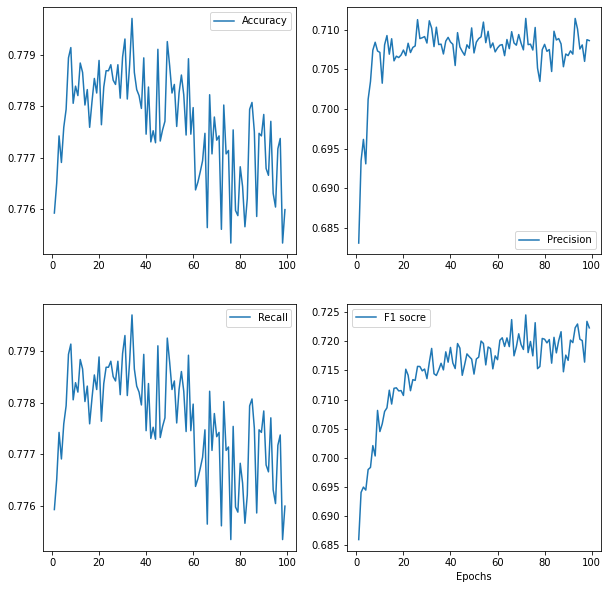

In [ ]:

acc = [i[0] for i in result]
pre = [i[1] for i in result]
rec = [i[2] for i in result]
f1 = [i[3] for i in result]
x = [i for i in range(1,100)]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
plt.xlabel("Epochs")
axes[0][0].plot(x,acc,label="Accuracy")
axes[0][1].plot(x,pre,label="Precision")
axes[1][0].plot(x,rec,label="Recall")
axes[1][1].plot(x,f1,label="F1 socre")
axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=4 #no.of unique values in the target class not inclusive of the end value
#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(X_test)
#printing the predictions
y_pred_1

array([[0.75831749, 0.13716532, 0.04801539, 0.0565018 ],
       [0.78069424, 0.16928101, 0.03610031, 0.01392445],
       [0.73287919, 0.19925724, 0.04334144, 0.02452213],
       ...,
       [0.74989087, 0.20010078, 0.04038536, 0.00962299],
       [0.66340554, 0.22187542, 0.06970015, 0.04501888],
       [0.75330856, 0.18840801, 0.04950392, 0.00877951]])

In [ ]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]
#printing the predictions

# for error metrics
# lightgbm
scoring2(y_pred_1,y_test)

[0.7781880478352711,
 0.7529122471634648,
 0.7781880478352711,
 0.6863782999927928]